In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
data1 = pd.read_csv('/gdrive/My Drive/DS_contest/datathree_Interpolation_2.csv')

In [ ]:
from sklearn.metrics import make_scorer

def sMAPE(actual_values, predicted_values, expsMAPE = False):
  '''
  logY를 regression하는 경우에 expsMAPE = True로 입력, 아니면 expsMAPE = False로 놔두면 됨
  reg_sMAPE = GridSearchCV(RandomForestRegressor(), {}, scoring=make_scorer(sMAPE, greater_is_better=False)) 이런식으로 쓰면됨
  reg
  '''
  if expsMAPE == True:
    predicted_values = np.exp(predicted_values)
    actual_values = np.exp(actual_values)
  return 1/len(actual_values) * np.sum(2*np.abs(actual_values - predicted_values) / (np.abs(actual_values) + np.abs(predicted_values)) * 100)

In [ ]:
from scipy.stats import cauchy
from scipy.stats import mode

In [ ]:
print(c_value)

[1048.9497815568386, 1120.8286309444054, 996.7521314269428, 848.0063282454524, 1002.9725089668718, 944.9626762801223, 1194.6304862082923, 1451.778049855104, 1222.8776129264022, 1971.7129075967027, 1286.7872647717902, 754.4657529204804, 1181.4238651746318, 725.0635204651451, 1293.5026218225742, 1421.084886151419, 1252.4700896500512, 1054.766934710832, 848.8043183776708, 889.7944964360221, 725.161836306177, 898.6505088278248, 1528.600209385684, 3228.4642622881875, 4237.387333895067, 4776.845272293613, 875.5055836775383, 1674.4561879021182, 1403.5581069711156, 1697.5737843299642, 1523.997110269647, 671.1028661258996, 600.5960580325949, 616.0216797238554, 2028.3515814452471, 675.305808361342, 3307.481066845389, 1099.5183229457837, 1091.0462736417533, 1061.0705964746408, 810.7725456409069, 1518.6708827701036, 30555.59264752691, 1255.9369591228324, 1458.2227464642294, 621.081652598759, 1043.5958389020707, 686.6742014807849, 668.8210455143061, 684.1085833240301, 642.9760190248652, 1016.104766

In [ ]:
c_value = []
real_list = []
pred_list = []
list_g = []
list_c = []
for num in range(232):
  train_y = data1['X_t'][num*12:num*12+10]
  c_value.append(sum(train_y))
list_sMAPE = []
for num in range(232):
  num_g = 0
  num_c = 0
  train_x = data1['time'][num*12:num*12+10]
  train_y = data1['Interpolated X_t'][num*12:num*12+10]
  mu = data1['time'][num*12]
  mse_dic = {}
  bound_c = int(c_value[num])
  for gamma in range(1, 1000, 100):
    for c in range(bound_c, int(3/2*bound_c), 10):
      dist = cauchy(gamma, mu)
      mse = 0
      for x, y in zip(train_x, train_y):
        mse = mse + ( c * dist.pdf(x) - y) ** 2
      mse_dic[(gamma, c)] = mse
  m = min(mse_dic, key=mse_dic.get)
  num_g = m[0]
  num_c = m[1]
  list_g.append(num_g)
  list_c.append(num_c)
  DIST = cauchy(num_g, mu)
  X11 = data1['Interpolated X_t'][num*12+10]
  X12 = data1['Interpolated X_t'][num*12+11]
  real_list.append(X11 + X12)
  t11 = data1['time'][num*12 + 10]
  t12 = data1['time'][num*12 + 11]
  pred_list.append(num_c * (DIST.pdf(t11) + DIST.pdf(t12)))

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in long_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in long_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [ ]:
real_list = np.array(real_list)
pred_list = np.array(pred_list)

In [ ]:
real_list

In [ ]:
pred_list

In [ ]:
print(sMAPE(real_list, pred_list, False)) 

In [ ]:
gamma_range = np.arange(0, 5, 0.5)
num_g = 0
num_c = 0
train_x = data1['time'][0:10]
train_y = data1['Interpolated X_t'][0:10]
mu = data1['time'][0]
mse_dic = {}
bound_c = int(c_value[num])
for gamma in gamma_range:
  for c in range(bound_c, int(3/2*bound_c), 10):
    for mu in range(-100, 0, 10):
      dist = cauchy(gamma, mu)
      mse = 0
      for x, y in zip(train_x, train_y):
        mse = mse + ( c * dist.pdf(x) - y) ** 2
      mse_dic[(gamma, c, mu)] = mse
m = min(mse_dic, key=mse_dic.get)
num_g = m[0]
num_c = m[1]
num_mu = m[2]
DIST = cauchy(num_g, num_mu)
X11 = data1['Interpolated X_t'][10]
X12 = data1['Interpolated X_t'][11]
t11 = data1['time'][10]
t12 = data1['time'][11]

In [ ]:
data1['time'][0]

In [ ]:
y_list = []
for i in range(0, 12):
  y_list.append(num_c * DIST.pdf(data1['time'][i]))

In [ ]:
num_g

In [ ]:
num_mu

In [ ]:
all_list = list(data1['X_t'][0:12])

In [ ]:
plt.plot(list(range(1, 13)), all_list,'o')
plt.plot(list(range(1, 13)), y_list, 'o')
plt.show()

# **추정함수**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [ ]:
def estimate_distribution(data, dist_name, x_size=100):
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    
    mean = params[-2]
    std = params[-1]
    
    n = data.shape[0]
    x = np.linspace(mean-std*3, mean+std*3, x_size)

    fitted_pdf = dist.pdf(x, *params[:-2], loc=mean, scale=std) 
    return x, params, fitted_pdf

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: ignored

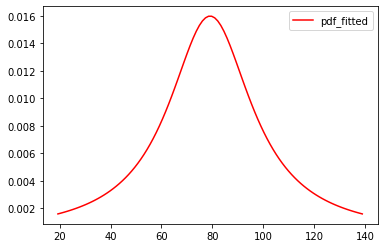

In [ ]:
for num in range(232):
  train_x = data1['time'][num*12:num*12+10]
  train_y = data1['Interpolated X_t'][num*12:num*12+10]
  x, params, fitted_pdf = estimate_distribution(train_y, 'cauchy')
  sns.lineplot(x, fitted_pdf, color='red', label='pdf_fitted')
  sns.distplot(samples, bins=30, norm_hist=True, label='original')
  legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


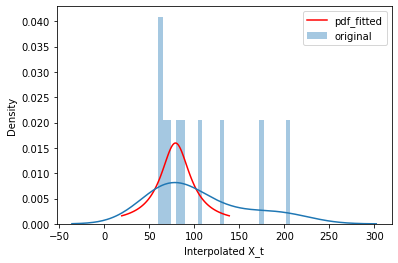

In [ ]:
train_x = data1['time'][0:10]
train_y = data1['Interpolated X_t'][0:10]
x, params, fitted_pdf = estimate_distribution(train_y, 'cauchy')
sns.lineplot(x, fitted_pdf, color='red', label='pdf_fitted')
sns.distplot(train_y, bins=30, norm_hist=True, label='original')
plt.legend()